# DS 2500 HW 6

Due: Fri Mar 24 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

| part                                        |    |
|:--------------------------------------------|---:|
| Part 1.1: Car weight & power                | 15 |
| Part 2: Polynomial Fitting                  | 35 |
| Part 3: Clustering States by Driving Habits | 15 |
| Part 4: PCA Iris                            | 15 |
| total                                       | 80 |

This HW is a bit shorter than most to allow you time to work on your projects :)

# Part 1.1: Car weight & power (15 points)
1. Given the data below, build and plot a `LinearRegression` model as shown immediately below:

<img src="https://i.ibb.co/W2X3BWb/horsepower-vs-weight.png" width=700>

Your output should be as aesthetically-good-looking and clear, but you needn't follow our color scheme / font sizes exactly.


In [2]:
import seaborn as sns

df_car = sns.load_dataset('mpg')
df_car.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

# Part 1.2: Interpretting Regressions (20 points, 10 each)

Answer each of the questions below by
- writing a few lines of relevant python code in one or two code cells
- writing one or two clear, succinct sentence response in markdown just below

1. Compute and interpret a quantification of how good the model in part 1.1 is.  How helpful is horsepower in explaining differences in the weight of a car for this particular set of cars?
1. One car has 50 more horsepower than another.  Using the model from part 1.1, whats our best guess as to how much heavier the more powerful car is?

# Part 2: Polynomial Fitting (35 points)

Identify the polynomial that `x, y` likely comes from.  Your response should be written out (may be done in markdown, not programmatically) as:

$$y = 1 + 2x + 3x^2$$
    
or similar.  Please round your coefficients to 2 decimal places so they're easily read.  Be sure to justify your chosen polynomial [degree](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) with a graph and a sentence.

#### Hints:
- How do I pick a polynomial degree?
    - see "Preventing Overfitting" from day 17
    - a `plt.plot()` of degree vs cross validated r2 might be a helpful
    - “Everything should be made as simple as possible, but no simpler.” 
- there is an order to our x variables, the earlier entries are often lower
    - this feels like the chinstrap tragedy from day 13 ...
- after cross validation I'll have a bunch of models, which do I report in my final polynomial estimate?
    - none of these cross validated models are approrpiate

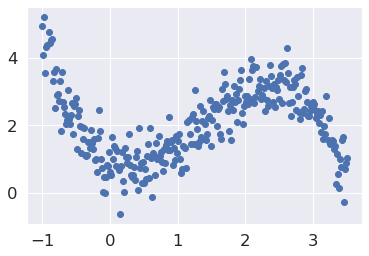

In [8]:
import pickle

# loads arrays x and y from file
with open('xy_hw6.p', 'rb') as f:
    x, y = pickle.load(f)
    
# # having trouble with the pickle file?  use the csv as a backup
# df = pd.read_csv('xy_hw6.csv')
# x = df['x'].values
# y = df['y'].values

plt.scatter(x, y);

# Part 3: Clustering States by Driving Habits  (15 points)

Use K-Means clustering to cluster all the states into k sub-groups so that each sub-group has similar car crash statistics.  
- Build a graph of how the mean distance from sample to centroid changes as k increases from two to seven.
- Write one or two sentences which give the number of sub-groups best suited for this data (i.e. find the "elbow").  
    - If no particular k seems much better than the others, characterize what about the graph leads you to this conclusion.

Hint:
- is this raw data, without any preprocessing steps applied, appropriate for clustering?
    - no

In [12]:
df_car = sns.load_dataset('car_crashes')
df_car.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

# Part 4: PCA Iris (15 points)
Build the following "Principal Component Map" from all four features in the iris dataset below.  

<img src='https://i.ibb.co/2Ktt1Xm/iris-pca.png' width=800px>

You're welcome to submit a `matplotlib` scatter for full credit, but you may find the interactive `plotly` graph more fun to work with.  You can install plotly with `pip3 install plotly` or similar and build the necessary scatter plot with:
```python
import plotly.express as px

fig = px.scatter(df_iris, x='pca0', y='pca1', hover_data=df_iris.columns, color='species')
fig.show()

# if you want to export to html (not needed for HW at all, just good to know!)
fig.write_html('iris_pca.html')
```

In [15]:
df_iris = sns.load_dataset('iris')

df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa